# ADS Homework #5: Clustering Algorithms
Monday 2-5pm Session, Proffessor Tim Savage

Please submit this assignment to the NYU Classes 'Assignments' section by 12:00pm on Monday, December 17, strictly labeling the assignments with the format **'ADS_HW1_(your net ID).ipynb'**. Be sure not to confuse Net ID (e.g. 'acs882') with N-number ('N166...'). This homework is here for you to better understand and practice the material; while you may discuss approaches to problems with your classmates (in fact, this is encouraged!), please ensure that all final code submitted is your own. You may reach out to the TA, Alex Shannon, at acs882@nyu.edu.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Problem 1**) Explore the bias/variance trade-off that is associated with all prediction algorithms. To do so, use the randomly generated data below. Deploy the KNN algorithm with K = 3, K = 10, K = 25, and K = 49, and K = 100. Generate separate graphs for each.  

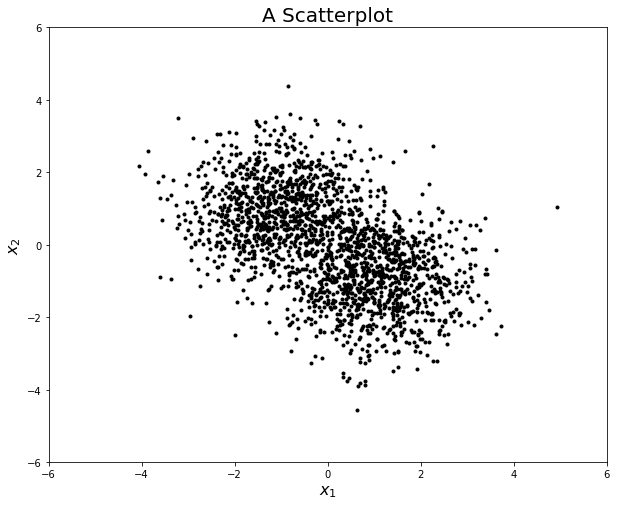

In [2]:
np.random.seed(12345)
red = np.random.multivariate_normal([-1, 1], [[1,0],[0,1]], 1000)
blue = np.random.multivariate_normal([1, -1], [[1,0],[0,1]], 1000)

plt.figure(figsize=(10,8))
plt.plot(red, blue, 'k.')
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.xlabel(r'$x_1$', fontsize = 16)
plt.ylabel(r'$x_2$', fontsize = 16)
plt.title(r'A Scatterplot', fontsize = 20)
plt.show()

**Problem 2**) Read in the spam dataset, and split into training and test sets.  Increase the number of features used for analysis to the first 10 features, implement all the classifiers shown in class, namely KNN, RFF, LDA, MNL, NB, and Guessing.  Compare the accuracy and MSE of each method. (Note that MNL in this case is just the logit classifier.)

In [19]:
%matplotlib inline
import warnings
import numpy as np
import pandas as pd
from numpy import random
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
import patsy
from statsmodels.graphics.api import abline_plot
import numpy.linalg as linalg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from tabulate import tabulate
warnings.simplefilter('ignore')
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
from pylab import get_cmap

In [3]:
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/"
              "spambase/spambase.data")
spam = pd.read_csv(target_url, header=None, prefix="v")

spam.rename(columns={'v57':'spam'}, inplace=True)
print (spam['spam'].head())
print (spam['spam'].tail())

0    1
1    1
2    1
3    1
4    1
Name: spam, dtype: int64
4596    0
4597    0
4598    0
4599    0
4600    0
Name: spam, dtype: int64


In [4]:
spam.head()

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v48,v49,v50,v51,v52,v53,v54,v55,v56,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [12]:
np.random.seed(12345)
spam['index'] = np.random.uniform(low = 0, high = 1, size = len(spam))
spam['test'] = pd.get_dummies(spam['index'] <= 0.3333)[1]

# We don't need the index, so drop it.
del spam['index']

# Now we can create new train and test dataframes.
# Note the format of these command lines.
# It basically resolves as create spamtest as a subset of spam when test is 1.
# Otherwise, it is train.
spamtest = spam[spam['test'] == 1]
spamtrain = spam[spam['test'] == 0]

# Confirm data has been split properly.
print(len(spamtrain))
print(len(spamtest))
print(len(spam))

3056
1545
4601


In [32]:
X = spam.iloc[:, 0:9].values  
y = spam.iloc[:, 57].values  
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  

In [33]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [39]:
#KNN
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=6)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [40]:
y_pred = classifier.predict(X_test)  

In [41]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[534  36]
 [108 243]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       570
           1       0.87      0.69      0.77       351

   micro avg       0.84      0.84      0.84       921
   macro avg       0.85      0.81      0.83       921
weighted avg       0.85      0.84      0.84       921



In [42]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

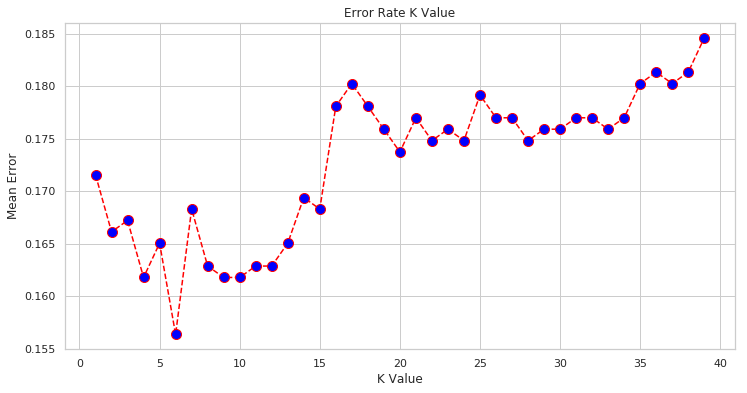

In [43]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

i guess my choice of 6 performs best

In [51]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import mean_squared_error

lda = LDA()
lda.fit(X_train, y_train)
ypred = lda.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

ACC = (cm[0][0] + cm[1][1]) / (len(ypred))

table = [[" ","1", "2"],
         ["1", cm[0][0], cm[0][1]], 
         ["2", cm[1][0], cm[1][1]]]
print('The confusion matrix is:')
print(tabulate(table, tablefmt="fancy_grid", numalign = "center"))
print("The Accuracy Rate is", ACC)
print("The Mean Squared Error is", MSE)

The confusion matrix is:
╒═══╤═════╤═════╕
│   │  1  │  2  │
├───┼─────┼─────┤
│ 1 │ 534 │ 36  │
├───┼─────┼─────┤
│ 2 │ 108 │ 243 │
╘═══╧═════╧═════╛
The Accuracy Rate is 0.843648208469
The Mean Squared Error is 0.156351791531


In [60]:
#MNL
from statsmodels.discrete.discrete_model import MNLogit

mnlogit = MNLogit(y_train, X_train).fit()
print(mnlogit.summary())
print()
pred = np.array(mnlogit.predict(X_test))

prediction = np.zeros((len(ypred),), dtype=np.int) + 3
for i in range(len(prediction)): 
    if pred[i][0] > pred[i][1] : prediction[i] = 0
    if pred[i][1] > pred[i][0] : prediction[i] = 1
        
cm = confusion_matrix(y_test, prediction)
MSE = mean_squared_error(y_test, prediction)

ACC = (cm[0][0] + cm[1][1]) / (len(ypred))

table = [[" ","1", "2"],
         ["1", cm[0][0], cm[0][1]], 
         ["2", cm[1][0], cm[1][1]]]
print("The confusion matrix is:")
print(tabulate(table, tablefmt="fancy_grid", numalign = "center"))
print("The Accuracy Rate is", ACC)
print("The Mean Squared Error is", MSE)

Optimization terminated successfully.
         Current function value: 0.476566
         Iterations 9
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                 3680
Model:                        MNLogit   Df Residuals:                     3671
Method:                           MLE   Df Model:                            8
Date:                Sat, 08 Dec 2018   Pseudo R-squ.:                  0.2907
Time:                        22:21:12   Log-Likelihood:                -1753.8
converged:                       True   LL-Null:                       -2472.6
                                        LLR p-value:                4.150e-305
       y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2061      0.039      5.350      0.000       0.131       0.282
x2            -0.0442      0.

In [62]:
#nb
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
ypred = gnb.predict(X_test)
MSE = mean_squared_error(y_test, ypred)

cm = confusion_matrix(y_test, ypred)

ACC = (cm[0][0] + cm[1][1]) / (len(ypred))

table = [[" ","1", "2"],
         ["1", cm[0][0], cm[0][1]], 
         ["2", cm[1][0], cm[1][1]]]
print("The confusion matrix is:")
print(tabulate(table, tablefmt="fancy_grid", numalign = "center"))
print("The Accuracy Rate is", ACC)
print("The Mean Squared Error is", MSE)

The confusion matrix is:
╒═══╤═════╤═════╕
│   │  1  │  2  │
├───┼─────┼─────┤
│ 1 │ 552 │ 18  │
├───┼─────┼─────┤
│ 2 │ 211 │ 140 │
╘═══╧═════╧═════╛
The Accuracy Rate is 0.751357220413
The Mean Squared Error is 0.248642779587


In [63]:
#RF
from sklearn.ensemble import RandomForestClassifier

np.random.seed(12345)
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)
ypred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
RFcm = cm
MSE = mean_squared_error(y_test, y_pred)

ACC = (cm[0][0] + cm[1][1]) / (len(ypred))

table = [[" ","1", "2"],
         ["1", cm[0][0], cm[0][1]], 
         ["2", cm[1][0], cm[1][1]]]
print("The confusion matrix is:")
print(tabulate(table, tablefmt="fancy_grid", numalign = "center"))
print("The Accuracy Rate is", ACC)
print("The Mean Squared Error is", MSE)

The confusion matrix is:
╒═══╤═════╤═════╕
│   │  1  │  2  │
├───┼─────┼─────┤
│ 1 │ 534 │ 36  │
├───┼─────┼─────┤
│ 2 │ 108 │ 243 │
╘═══╧═════╧═════╛
The Accuracy Rate is 0.843648208469
The Mean Squared Error is 0.156351791531


In [64]:
# KNN, RF, LDA, MNL, and NB Classifiers using Abalone data.  Let's bring this all together for ease of use.

NN = 65
how = 'distance'
ypred = knn.predict(X_test)
cm = confusion_matrix(y_test, ypred)
knnACC = (cm[0][0] + cm[1][1]) / (len(ypred))
knnMSE = mean_squared_error(y_test, ypred)

rf = RandomForestClassifier(n_estimators = 20)
rf.fit(X_train, y_train)
ypred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
rfACC = (cm[0][0] + cm[1][1] ) / (len(ypred))
rfMSE = mean_squared_error(y_test, ypred)

lda = LDA()
lda.fit(X_train, y_train)
ypred = lda.predict(X_test)
cm = confusion_matrix(y_test, ypred)
ldaACC = (cm[0][0] + cm[1][1] ) / (len(ypred))
ldaMSE = mean_squared_error(y_test, ypred)

mnlogit = MNLogit(y_train, X_train).fit()
pred = np.array(mnlogit.predict(X_test))
prediction = np.zeros((len(ypred),), dtype=np.int) + 3
for i in range(len(prediction)): 
    if pred[i][0] > pred[i][1] : prediction[i] = 0
    if pred[i][1] > pred[i][0] : prediction[i] = 1

cm = confusion_matrix(y_test, prediction)
mnlACC = (cm[0][0] + cm[1][1] ) / (len(ypred))
mnlMSE = mean_squared_error(y_test, prediction)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
ypred = gnb.predict(X_test)
cm = confusion_matrix(y_test, ypred)
nbACC = (cm[0][0] + cm[1][1]) / (len(ypred))
nbMSE = mean_squared_error(y_test, ypred)

# What would a confusion matrix with random allocation look like?

ypred = np.random.permutation(y_test)
cm = confusion_matrix(y_test, ypred)
ranACC = (cm[0][0] + cm[1][1]) / (len(ypred))
ranMSE = mean_squared_error(y_test, ypred)

Optimization terminated successfully.
         Current function value: 0.476566
         Iterations 9


In [65]:
# Here is the relative performance of our classifiers, including random guessing.

print('Accuracy of KNN, RF, LDA, MNL, NB, and Guessing')
print('%f %f %f %f %f %f' % (knnACC, rfACC, ldaACC, mnlACC, nbACC, ranACC))
print('')
print('MSE of KNN, RF, LDA, MNL, NB, and Guessing')
print('%f %f %f %f %f %f' % (knnMSE, rfMSE, ldaMSE, mnlMSE, nbMSE, ranMSE))

Accuracy of KNN, RF, LDA, MNL, NB, and Guessing
0.815418 0.843648 0.769815 0.803474 0.751357 0.548317

MSE of KNN, RF, LDA, MNL, NB, and Guessing
0.184582 0.147666 0.230185 0.196526 0.248643 0.451683
